# Import all the necessary packages

In [ ]:
%%capture
%pip install accelerate

In [ ]:
import os
import torch

In [ ]:
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    pipeline,
    logging,
)

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


# Login into huugingface hub to get access to lama model

In [ ]:
from huggingface_hub import login
login()

In [ ]:
# if torch.cuda.is_available():
#   model_id = "meta-llama/Llama-2-7b-chat-hf"
#   model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.float16, device_map="auto")
#   model.cuda()
#   tokenizer = AutoTokenizer.from_pretrained(model_id)
#   tokenizer.use_default_system_prompt = False

In [ ]:
model

NameError: name 'model' is not defined

In [ ]:
import transformers

# Loading base meta-llama/llama-2-7b-chat-hf model
*And printing smaple output when a prompt is given to this base model*

In [ ]:
model = "meta-llama/Llama-2-7b-chat-hf"
prompt = "What is a large language model?"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    torch_dtype=torch.float16,
    # device_map="auto",
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
sequences = pipeline(
    f'[INST] {prompt} [/INST]',
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_length=200,
)
for seq in sequences:
    print(f"Result: {seq['generated_text']}")


NameError: name 'pipeline' is not defined

In [ ]:
prompt = "What is crime"
sequences = pipeline(
    f'[INST] {prompt} [/INST]',
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_length=500,
)
for seq in sequences:
    print(f"Result: {seq['generated_text']}")

Result: [INST] What is crime [/INST]  Crime refers to any act or omission that violates the law and is punishable by the state or federal government. It can take many forms, including:

1. Violent crimes: These are crimes that involve physical harm or the threat of physical harm to another person, such as murder, assault, and robbery.
2. Property crimes: These are crimes that involve the theft or destruction of property, such as burglary, theft, and vandalism.
3. White collar crimes: These are crimes that are committed by businesses or individuals for financial gain, such as fraud, embezzlement, and money laundering.
4. Drug crimes: These are crimes that involve the possession, distribution, or manufacture of illegal drugs, such as drug trafficking and drug possession.
5. Public order crimes: These are crimes that disrupt the normal functioning of society, such as disorderly conduct, loitering, and vagrancy.
6. Cyber crimes: These are crimes that involve the use of computers or the int

# Loading Fine tuned model from hugging face
*printing the output from the fine tuned model when a prompt is given*

In [ ]:
modelF = "Chandana03/Llama-2-7b-chat-hf.legal-FineTune"

In [ ]:
tokenizerF = AutoTokenizer.from_pretrained(modelF)
pipelineF = transformers.pipeline(
    "text-generation",
    model=modelF,
    torch_dtype=torch.float16,
    device_map="auto",
)

tokenizer_config.json:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.61G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at Chandana03/Llama-2-7b-chat-hf.legal-FineTune were not used when initializing LlamaForCausalLM: ['model.layers.0.self_attn.q_proj.base_layer.weight', 'model.layers.0.self_attn.q_proj.lora_A.default.weight', 'model.layers.0.self_attn.q_proj.lora_B.default.weight', 'model.layers.0.self_attn.v_proj.base_layer.weight', 'model.layers.0.self_attn.v_proj.lora_A.default.weight', 'model.layers.0.self_attn.v_proj.lora_B.default.weight', 'model.layers.1.self_attn.q_proj.base_layer.weight', 'model.layers.1.self_attn.q_proj.lora_A.default.weight', 'model.layers.1.self_attn.q_proj.lora_B.default.weight', 'model.layers.1.self_attn.v_proj.base_layer.weight', 'model.layers.1.self_attn.v_proj.lora_A.default.weight', 'model.layers.1.self_attn.v_proj.lora_B.default.weight', 'model.layers.10.self_attn.q_proj.base_layer.weight', 'model.layers.10.self_attn.q_proj.lora_A.default.weight', 'model.layers.10.self_attn.q_proj.lora_B.default.weight', 'model.layers.10.self_attn

generation_config.json:   0%|          | 0.00/183 [00:00<?, ?B/s]

In [ ]:
promptF='what is crime'
sequencesF = pipelineF(
    f'[INST] {promptF} [/INST]',
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_length=200,
)
for seq in sequencesF:
    print(f"Result: {seq['generated_text']}")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
import pandas as pd


In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# Example with multiple references and a candidate sentence
references = ["Can you provide some sections and laws that are used by lawyers"]
candidate = " Constitution of India: The Constitution of India sets out the basic structure of the Indian legal system, including the rights and duties of individuals, the powers of the government, and the relationship between the federal and state governments."

# Calculate BLEU score
bleu_score = sentence_bleu([references], candidate)
print(f"BLEU Score: {bleu_score}")


BLEU Score: 0


In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# Example with multiple references and a candidate sentence
references = ["tell me about section 420",'This section deals with the offense of cheating and dishonestly inducing the delivery of property. If someone cheats another person and, as a result, induces that person to deliver property or alter valuable securities, they can be punished under this section. ']
candidate = ' It is crucial to consult a legal professional for advice on how to interpret and apply the law.In general, Section 420 of the Indian Penal Code (IPC) pertains to the offense of criminal intimidation. It is defined under IPC Section 420 as a criminal act that involves threatening or attempting to threaten someone in order to cause harm or apprehension to that person or a third party. Penalties for committing the offense of criminal intimidation vary depending on the specific circumstances of the offense and the severity of the harm caused. For example, criminal intimidation can be punished with a prison term of up to two years or with a fine, or both, under IPC Section 420 It is important to keep in mind that the laws of India are subject to frequent changes and interpretations, and that legal advice should generally only be sought from qualified legal professionals with appropriate knowledge of the relevant laws.'

# Calculate BLEU score
bleu_score = sentence_bleu([references], candidate)
print(f"BLEU Score: {bleu_score}")

BLEU Score: 0


In [ ]:
# from nltk.translate.meteor_score import meteor_score

# # Example with multiple references and a candidate sentence
# references = ["Reference sentence 1", "Reference sentence 2"]
# candidate = "Generated sentence"

# # Calculate METEOR score
# meteor_score = meteor_score(references, candidate)
# print(f"METEOR Score: {meteor_score}")

In [ ]:
ref = ["'What are the potential legal risks in the following scenario under the Indian Penal Code: 'Ravi sends an email to his friends that contains defamatory remarks about a common acquaintance, thinking it is a private conversation.'"]
gen = ['Ravi could potentially face legal consequences for defamation under Section 499 of the Indian Penal Code. Even though he considered the email a private conversation, the act of sending defamatory remarks about an individual to others could still be construed as defamation.']

In [ ]:

ref = ["How do the powers of the 'Rajya Sabha' compare to those of the 'Lok Sabha'?"]
gen = ['Both Rajya Sabha (Upper House) and Lok Sabha (Lower House) are integral to the Indian Parliament. While Lok Sabha has greater power in matters of finance and money bills, and deciding the executive government, Rajya Sabha holds special powers to declare a subject as of national importance and safeguards the interests of states and union territories.']

In [ ]:

from nltk.translate.bleu_score import SmoothingFunction, corpus_bleu, sentence_bleu


def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

ref = ["How do the powers of the 'Rajya Sabha' compare to those of the 'Lok Sabha'?"]
gen = ['Both Rajya Sabha (Upper House) and Lok Sabha (Lower House) are integral to the Indian Parliament. While Lok Sabha has greater power in matters of finance and money bills, and deciding the executive government, Rajya Sabha holds special powers to declare a subject as of national importance and safeguards the interests of states and union territories.']
bleu(ref,gen)

0.007318821255882091

In [ ]:

def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

ref=['tell me about section 420? In the context of Indian law, Section 420 is a provision under the Indian Penal Code (IPC) that deals with the offense of cheating and dishonestly inducing delivery of property. Here is the content of Section 420']
gen=["Section 420 of the Indian Penal Code (IPC) pertains to the offense of criminal intimidation. It is defined under IPC Section 420 as a criminal act that involves threatening or attempting to threaten someone in order to cause harm or apprehension to that person or a third party. Penalties for committing the offense of criminal intimidation vary depending on the specific circumstances of the offense and the severity of the harm caused. For example, criminal intimidation can be punished with a prison term of up to two years or with a fine, or both, under IPC Section 420 It is important to keep in mind that the laws of India are subject to frequent changes and interpretations, and that legal advice should generally only be sought from qualified legal professionals with appropriate knowledge of the relevant laws."]
bleu(ref,gen)

0.0588235294117647

In [ ]:
def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

    ref=["What is the importance of Article 32 of the Indian Constitution?"]
    gen=["Article 32 is known as the 'Heart and Soul of the Constitution'. It provides for the right to constitutional remedies, enabling citizens to approach the Supreme Court for enforcement of their Fundamental Rights. This provision acts as the guardian of Fundamental Rights, making them meaningful and effective"]

    print(bleu(ref,gen))

In [ ]:


def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

ref=['create  500 words case file for legal proceedings  by taking victims statement is John, a pedestrian, was hit by a car while crossing the street at a crosswalk?']
gen=["Johns victim statement highlights the need for better driver training and compliance with traffic laws to prevent pedestrian accidents. John's legal team could argue that the driver of the car in the incident violated the rights of pedestrians by failing to stop at the crosswalk and failing to show due care and attention. , John's legal team could also pursue a negligence claim against the driver of the car, arguing that the driver was negligent in failing to stop at the crosswalk and causing injury to John. , John's legal team could also argue that the city and state were at fault for allowing inadequate road infrastructure in the area, which led to the accident. " ]
bleu(ref,gen)

0.004162221165230919

In [ ]:
ref = ["'What are the potential legal risks in the following scenario under the Indian Penal Code: 'Ravi sends an email to his friends that contains defamatory remarks about a common acquaintance, thinking it is a private conversation.'"]
gen = ['Ravi could potentially face legal consequences for defamation under Section 499 of the Indian Penal Code. Even though he considered the email a private conversation, the act of sending defamatory remarks about an individual to others could still be construed as defamation.']

In [ ]:
def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu
ref = ["'What are the potential legal risks in the following scenario under the Indian Penal Code: 'Ravi sends an email to his friends that contains defamatory remarks about a common acquaintance, thinking it is a private conversation.'"]
gen = ['Ravi could potentially face legal consequences for defamation under Section 499 of the Indian Penal Code. Even though he considered the email a private conversation, the act of sending defamatory remarks about an individual to others could still be construed as defamation.']
bleu(ref,gen)

0.12195121951219512

In [ ]:
pip install pyter3

In [ ]:
import pyter

def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref=['create  500 words case file for legal proceedings  by taking victims statement is John, a pedestrian, was hit by a car while crossing the street at a crosswalk?']
gen=["Johns victim statement highlights the need for better driver training and compliance with traffic laws to prevent pedestrian accidents. John's legal team could argue that the driver of the car in the incident violated the rights of pedestrians by failing to stop at the crosswalk and failing to show due care and attention. , John's legal team could also pursue a negligence claim against the driver of the car, arguing that the driver was negligent in failing to stop at the crosswalk and causing injury to John. , John's legal team could also argue that the city and state were at fault for allowing inadequate road infrastructure in the area, which led to the accident. " ]
ter(ref,gen)

3.857142857142857

In [ ]:
import pyter

def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref = ["'What are the potential legal risks in the following scenario under the Indian Penal Code: 'Ravi sends an email to his friends that contains defamatory remarks about a common acquaintance, thinking it is a private conversation.'"]
gen = ['Ravi could potentially face legal consequences for defamation under Section 499 of the Indian Penal Code. Even though he considered the email a private conversation, the act of sending defamatory remarks about an individual to others could still be construed as defamation.']
ter(ref,gen)

0.9444444444444444

In [ ]:
def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref = ["How do the powers of the 'Rajya Sabha' compare to those of the 'Lok Sabha'?"]
gen = ['Both Rajya Sabha (Upper House) and Lok Sabha (Lower House) are integral to the Indian Parliament. While Lok Sabha has greater power in matters of finance and money bills, and deciding the executive government, Rajya Sabha holds special powers to declare a subject as of national importance and safeguards the interests of states and union territories.']
ter(ref,gen)

3.3333333333333335

In [ ]:
# ter

In [ ]:
def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref = ["create FIR Document by taking victims statement is John, a pedestrian, was hit by a car while crossing the street at a crosswalk?"]
gen = ["I am John, a pedestrian who was hit by a car while crossing the street at a crosswalk. My statement is to inform the authorities of the accident and to provide a detailed account of the events leading up to and following the incident. I was crossing the street at a designated crosswalk when the car struck me. I suffered moderate injuries and was taken to a nearby hospital for medical treatment. I believe that the driver of the car was negligent and failed to yield the right of way at the crosswalk, causing the accident. I demand justice and compensation for the injuries sustained in the incident. I have attached photographic evidence of the accident scene, including photographs of the damage to the car and the injuries sustained by me. Sincerely, John Victim's Signature: John"]
ter(ref,gen)

5.3478260869565215

In [ ]:
def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref = ["Can you provide some sections and laws that are used by lawyers"]
gen = ["Sure! Here are some laws and regulations that are often used by lawyers: 1. Constitution of India: The Constitution of India sets out the basic structure of the Indian legal system, including the rights and duties of individuals, the powers of the government, and the relationship between the federal and state governments. 2. Indian Contract Act, 1872: The Indian Contract Act sets out the rules for the formation, performance, and enforcement of contracts in India. 3. Indian Penal Code, 1837: The Indian Penal Code sets out the provisions for criminal law in India, including the punishments for various crimes. 4. Civil Procedure Code, 1908: The Civil Procedure Code sets out the rules for civil litigation in India, including the procedures for filing lawsuits, serving notice, and conducting trials. 5. Code of Civil Procedure, 1955: The Code of Civil Procedure sets out the rules for filing and handling civil cases in India, including the procedures for filing lawsuits, serving notice, and conducting trials. 6. Arbitration and Conciliation Act, 1996: The Arbitration and Conciliation Act sets out the rules for the resolution of disputes through arbitration and conciliation in India. 7. Insolvency and Bankruptcy Code, 2016: The Insolvency and Bankruptcy Code sets out the rules for the resolution of insolvency and bankruptcy in India. 8. Securities Exchange Board of India Act, 1992: The Securities Exchange Board of India Act sets out the rules for the regulation of securities markets in India. 9. Foreign Exchange Management Act, 1999: The Foreign Exchange Management Act sets out the rules for the regulation of foreign exchange transactions in India. These are just a few examples of the laws and regulations that lawyers in India must be familiar with. The specific laws and regulations that apply to a given situation will depend on the facts and circumstances of the case."]
ter(ref,gen)

24.666666666666668

In [ ]:
def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref = ["What is section 498 a of Indian penal code?"]
gen = ["""498-A of Indian Penal Code deals with "Husband or relative of husband subjecting a woman to cruelty." This section was enacted in 1970 to criminalize the act of subjecting a woman to cruelty by her husband or any relative of her husband. Punishment for violation of this section includes imprisonment for a term which may extend to 3 years and also to pay a fine. The law was enacted to protect the rights of women in India and to curb the practice of cruelty meted out to them by their husbands or relatives. Since its enactment, this law has been instrumental in protecting the rights of women and in maintaining law and order in the country. However, there have been some criticisms of this law. Some have argued that this law is often misused and that women themselves may use it to harass their husbands or other relatives. Others have pointed out that the definition of cruelty under this law is vague and can include trivial acts, such as scolding or refusing to cook meals. Despite these criticisms, the law remains an important tool for protecting the rights of women in India. It has helped to change attitudes towards women and to promote gender equality, and has been instrumental in bringing perpetrators of domestic violence to justice. In conclusion, this law is a crucial provision in the Indian Penal Code that helps to protect the rights of women from being subjected to cruelty by their husbands or any relative of their husband. It is an important step towards gender equality and promoting a society that values and respects the rights of all individuals."""]
ter(ref,gen)

29.88888888888889

In [ ]:
def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref = ["What is the Judgement of 498A"]
gen = ["The case of 498A of the Indian Penal Code, 1860, is a landmark case in India related to domestic violence. In this case, a man was charged with and later convicted of murdering his wife, who was a victim of domestic violence. The court held that Section 302 (punishment for murder) and Section 149 (punishment for criminal conspiracy) of the IPC applied to this case, and the accused was accordingly sentenced to death. The court also considered several other factors in its decision, including the fact that the victim was a woman and was subject to violence by her husband and his family. The court held that domestic violence is a heinous crime that must be dealt with strongly, and that the law must be enforced to protect the rights of women and children. The judgment of 498A has been widely cited and has set a precedent for the enforcement of domestic violence laws in India. Reasons for the judgment of 498A: The court in the case of 498A observed that the Indian Penal Code, 1860 does not explicitly state that domestic violence falls within its purview. However, the court found that Section 2(a) of the IPC, which defines cruelty, applies to this case. The court further observed that domestic violence is a heinous crime that is not limited to any particular gender or community and that it is a serious offense against human dignity. The court noted that the law must be enforced to protect the rights of women and children who are the most vulnerable to domestic violence. Conclusion: The judgment of 498A in India highlights the importance of enforcing domestic violence laws to protect the rights of women and children. The court held that Section 2(a) of the IPC applies to this case and that the law must be enforced to prevent and punish such heinous crimes. The judgment has been widely cited and has set a precedent for the enforcement of domestic violence laws in India."]
ter(ref,gen)

54.333333333333336

In [ ]:
def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref = ["tell me about section 420"]
gen = ["As an AI language model, I don't have the authority to advise people or give legal advice. It is crucial to consult a legal professional for advice on how to interpret and apply the law. In general, Section 420 of the Indian Penal Code (IPC) pertains to the offense of criminal intimidation. It is defined under IPC Section 420 as a criminal act that involves threatening or attempting to threaten someone in order to cause harm or apprehension to that person or a third party. Penalties for committing the offense of criminal intimidation vary depending on the specific circumstances of the offense and the severity of the harm caused. For example, criminal intimidation can be punished with a prison term of up to two years or with a fine, or both, under IPC Section 420 It is important to keep in mind that the laws of India are subject to frequent changes and interpretations, and that legal advice should generally only be sought from qualified legal professionals with appropriate knowledge of the relevant laws."]
ter(ref,gen)

34.6

In [ ]:
def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref = ["Explain the principles and key provisions of the Goods and Services Tax (GST) Act in India."]
gen = ["The Goods and Services Tax (GST) Act in India is a comprehensive indirect tax law that was introduced in 2017 to replace multiple state and central taxes with a single tax system. The key provisions of the GST Act are as follows: 1. Constitutional Provisions: The GST Act is based on the Constitution of India, specifically Article 246, which provides for the levy of taxes by the Union and the states. 2. Tax Structure: The GST Act provides for a multi-tier tax structure, with taxes levied at the central, state, and local levels. The tax rates are categorized into four slabs: 5%, 12%, 18%, and 28%. 3. Taxable Events: The GST Act defines the taxable events, including the supply of goods and services, import of goods, and inter-state supply of goods and services. 4. Tax Incentives: The GST Act provides for tax incentives, such as the composition scheme, which allows small businesses to pay a lower tax rate. 5. Tax Credits: The GST Act allows tax credits for taxes paid on inputs, which can be used to offset the tax liability on output supplies. 6. Electronic Filing: The GST Act requires taxpayers to file returns electronically, which can be done through the GST portal. 7. Tax Compliance: The GST Act provides for tax compliance measures, such as the requirement to maintain records and submit returns, and the power of the tax authorities to conduct audits and inspections. 8. Dispute Resolution: The GST Act provides for a dispute resolution mechanism, which includes the GST Appellate Tribunal and the GST Council. 9. Anti-Dumping Duty: The GST Act provides for the imposition of anti-dumping duty on imported goods that are considered to be dumped in the Indian market. 10. Cross-Border Supplies: The GST Act provides for the taxation of cross-border supplies of goods and services, including the levy of taxes on imports and exports. These are some of the key provisions of the GST Act in India. The Act is a comprehensive and complex piece of legislation, and it is important to seek professional advice to understand its implications and compliance requirements."]
ter(ref,gen)

21.1875

In [ ]:
def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref = ["What are the potential legal risks in the following scenario under the Indian Penal Code: 'Ravi sends an email to his friends that contains defamatory remarks about a common acquaintance, thinking it is a private conversation."]
gen = ["Under the Indian Penal Code, the potential legal risks in the given scenario could include: 1. Defamation: Ravi's email could be considered defamatory, as it contains derogatory remarks about a person's character. If the recipients of the email share it with others, it could lead to the spread of defamatory material, which is a criminal offense under Section 499 of the Indian Penal Code. 2. Contempt of Court: If the email contains any remarks that could be considered contemptuous towards a court or any legal authority, it could lead to a criminal complaint under Section 228 of the Indian Penal Code. 3. Hate Speech: If the email contains any hate speech or incites violence against any particular group of people, it could lead to a criminal complaint under Section 153A of the Indian Penal Code. 4. Harassment: If the email contains any threatening or harassing language, it could lead to a criminal complaint under Section 506 of the Indian Penal Code. 5. Privacy Violation: If the email contains any personal information about the recipient without their consent, it could lead to a criminal complaint under Section 660 of the Indian Penal Code. It is important to note that the specific legal risks in the given scenario would depend on the facts and circumstances of the case. Therefore, it is advisable to consult with a legal professional to determine the potential legal risks in any given situation."]
ter(ref,gen)

6.027777777777778

In [ ]:
def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref = ["How do the powers of the 'Rajya Sabha' compare to those of the 'Lok Sabha'?"]
gen = ["The Rajya Sabha and the Lok Sabha are the two houses of the Indian Parliament. The Rajya Sabha, also known as the Council of States, is a permanent house with a maximum strength of 250 members. The members are elected by the state legislatures for a term of six years. The Rajya Sabha has limited powers compared to the Lok Sabha, and its main function is to review and amend bills passed by the Lok Sabha. The Lok Sabha, also known as the House of the People, is the lower house of the Indian Parliament with a maximum strength of 545 members. The members are elected directly by the people for a term of five years. The Lok Sabha has more powers than the Rajya Sabha, and it is responsible for passing laws and exercising control over the government. In summary, the Rajya Sabha has limited powers compared to the Lok Sabha, and its main function is to review and amend bills passed by the Lok Sabha. The Lok Sabha has more powers than the Rajya Sabha and is responsible for passing laws and exercising control over the government."]
ter(ref,gen)

12.2

In [ ]:
def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref = ["Explain the legal aspects surrounding online dispute resolution mechanisms and their enforceability in India."]
gen = ["The legal aspects surrounding ODR mechanisms in India include: 1. Jurisdiction: ODR mechanisms are subject to the jurisdiction of the courts in India. The Indian Contract Act, 1872, and the Information Technology Act, 2000, provide the legal framework for the enforcement of ODR mechanisms in India. 2. Legal recognition: ODR mechanisms are recognized as a valid mode of dispute resolution in India. The Indian Contract Act, 1872, and the Information Technology Act, 2000, provide legal recognition to ODR mechanisms. 3. Enforceability: ODR mechanisms are enforceable in India through the courts. The Indian Contract Act, 1872, and the Information Technology Act, 2000, provide the legal framework for the enforcement of ODR mechanisms in India. 4. Arbitration: ODR mechanisms can be used for arbitration in India. The Arbitration and Conciliation Act, 1996, provides the legal framework for arbitration in India. 5. Mediation: ODR mechanisms can be used for mediation in India. The Mediation Act, 2019, provides the legal framework for mediation in India. 6. Electronic evidence: ODR mechanisms can be used to collect and present electronic evidence in India. The Indian Evidence Act, 1872, provides the legal framework for the admission of electronic evidence in India. 7. Data privacy: ODR mechanisms must comply with data privacy laws in India. The Indian Data Protection Act, 2018, provides the legal framework for data privacy in India. 8. Intellectual property: ODR mechanisms must comply with intellectual property laws in India. The Indian Patents Act, 1970, and the Indian Copyright Act, 1957, provide the legal framework for intellectual property in India. 9. Consumer protection: ODR mechanisms must comply with consumer protection laws in India. The Consumer Protection Act, 1986, provides the legal framework for consumer protection in India. In conclusion, ODR mechanisms are legal and enforceable in India. They are subject to the jurisdiction of the courts in India and must comply with Indian laws, including the Indian Contract Act, 1872, the Indian Penal Code, 1860, the Information Technology Act, 2000, the Arbitration and Conciliation Act, 1996, the Mediation Act, 2019, the Indian Evidence Act, 1872, the Indian Data Protection Act, 2018, the Indian Patents Act, 1970, and the Indian Copyright Act, 1957."]
ter(ref,gen)

24.857142857142858

In [ ]:
def ter(ref, gen):
    '''
    Args:
        ref - reference sentences - in a list
        gen - generated sentences - in a list
    Returns:
        averaged TER score over all sentence pairs
    '''
    if len(ref) == 1:
        total_score =  pyter.ter(gen[0].split(), ref[0].split())
    else:
        total_score = 0
        for i in range(len(gen)):
            total_score = total_score + pyter.ter(gen[i].split(), ref[i].split())
        total_score = total_score/len(gen)
    return total_score

ref = ["Discuss the legal implications of the recent amendments to the Indian Penal Code regarding cybercrimes."]
gen = ["The recent amendments to the Indian Penal Code regarding cybercrimes have expanded the scope of criminal liability for offenses committed through digital means, and have introduced new provisions for dealing with such offenses. These amendments demonstrate the Indian government's commitment to addressing the growing threat of cybercrime in the country, and to ensuring that the legal framework is adequate to deal with the challenges posed by this type of crime."]
ter(ref,gen)

4.133333333333334

In [ ]:
# blue

In [ ]:

def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

ref = ["create FIR Document by taking victims statement is John, a pedestrian, was hit by a car while crossing the street at a crosswalk?"]
gen = ["I am John, a pedestrian who was hit by a car while crossing the street at a crosswalk. My statement is to inform the authorities of the accident and to provide a detailed account of the events leading up to and following the incident. I was crossing the street at a designated crosswalk when the car struck me. I suffered moderate injuries and was taken to a nearby hospital for medical treatment. I believe that the driver of the car was negligent and failed to yield the right of way at the crosswalk, causing the accident. I demand justice and compensation for the injuries sustained in the incident. I have attached photographic evidence of the accident scene, including photographs of the damage to the car and the injuries sustained by me. Sincerely, John Victim's Signature: John"]
bleu(ref,gen)

0.08888888888888888

In [ ]:
def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

ref = ["Can you provide some sections and laws that are used by lawyers"]
gen = ["Sure! Here are some laws and regulations that are often used by lawyers: 1. Constitution of India: The Constitution of India sets out the basic structure of the Indian legal system, including the rights and duties of individuals, the powers of the government, and the relationship between the federal and state governments. 2. Indian Contract Act, 1872: The Indian Contract Act sets out the rules for the formation, performance, and enforcement of contracts in India. 3. Indian Penal Code, 1837: The Indian Penal Code sets out the provisions for criminal law in India, including the punishments for various crimes. 4. Civil Procedure Code, 1908: The Civil Procedure Code sets out the rules for civil litigation in India, including the procedures for filing lawsuits, serving notice, and conducting trials. 5. Code of Civil Procedure, 1955: The Code of Civil Procedure sets out the rules for filing and handling civil cases in India, including the procedures for filing lawsuits, serving notice, and conducting trials. 6. Arbitration and Conciliation Act, 1996: The Arbitration and Conciliation Act sets out the rules for the resolution of disputes through arbitration and conciliation in India. 7. Insolvency and Bankruptcy Code, 2016: The Insolvency and Bankruptcy Code sets out the rules for the resolution of insolvency and bankruptcy in India. 8. Securities Exchange Board of India Act, 1992: The Securities Exchange Board of India Act sets out the rules for the regulation of securities markets in India. 9. Foreign Exchange Management Act, 1999: The Foreign Exchange Management Act sets out the rules for the regulation of foreign exchange transactions in India. These are just a few examples of the laws and regulations that lawyers in India must be familiar with. The specific laws and regulations that apply to a given situation will depend on the facts and circumstances of the case."]
bleu(ref,gen)

0.006622516556291391

In [ ]:

def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

ref = ["What is section 498 a of Indian penal code?"]
gen = ["""498-A of Indian Penal Code deals with "Husband or relative of husband subjecting a woman to cruelty." This section was enacted in 1970 to criminalize the act of subjecting a woman to cruelty by her husband or any relative of her husband. Punishment for violation of this section includes imprisonment for a term which may extend to 3 years and also to pay a fine. The law was enacted to protect the rights of women in India and to curb the practice of cruelty meted out to them by their husbands or relatives. Since its enactment, this law has been instrumental in protecting the rights of women and in maintaining law and order in the country. However, there have been some criticisms of this law. Some have argued that this law is often misused and that women themselves may use it to harass their husbands or other relatives. Others have pointed out that the definition of cruelty under this law is vague and can include trivial acts, such as scolding or refusing to cook meals. Despite these criticisms, the law remains an important tool for protecting the rights of women in India. It has helped to change attitudes towards women and to promote gender equality, and has been instrumental in bringing perpetrators of domestic violence to justice. In conclusion, this law is a crucial provision in the Indian Penal Code that helps to protect the rights of women from being subjected to cruelty by their husbands or any relative of their husband. It is an important step towards gender equality and promoting a society that values and respects the rights of all individuals."""]
bleu(ref,gen)

0.0036764705882352923

In [ ]:

def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

ref = ["What is the Judgement of 498A"]
gen = ["The case of 498A of the Indian Penal Code, 1860, is a landmark case in India related to domestic violence. In this case, a man was charged with and later convicted of murdering his wife, who was a victim of domestic violence. The court held that Section 302 (punishment for murder) and Section 149 (punishment for criminal conspiracy) of the IPC applied to this case, and the accused was accordingly sentenced to death. The court also considered several other factors in its decision, including the fact that the victim was a woman and was subject to violence by her husband and his family. The court held that domestic violence is a heinous crime that must be dealt with strongly, and that the law must be enforced to protect the rights of women and children. The judgment of 498A has been widely cited and has set a precedent for the enforcement of domestic violence laws in India. Reasons for the judgment of 498A: The court in the case of 498A observed that the Indian Penal Code, 1860 does not explicitly state that domestic violence falls within its purview. However, the court found that Section 2(a) of the IPC, which defines cruelty, applies to this case. The court further observed that domestic violence is a heinous crime that is not limited to any particular gender or community and that it is a serious offense against human dignity. The court noted that the law must be enforced to protect the rights of women and children who are the most vulnerable to domestic violence. Conclusion: The judgment of 498A in India highlights the importance of enforcing domestic violence laws to protect the rights of women and children. The court held that Section 2(a) of the IPC applies to this case and that the law must be enforced to prevent and punish such heinous crimes. The judgment has been widely cited and has set a precedent for the enforcement of domestic violence laws in India."]
bleu(ref,gen)

0.00303951367781155

In [ ]:

def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

ref = ["tell me about section 420"]
gen = ["As an AI language model, I don't have the authority to advise people or give legal advice. It is crucial to consult a legal professional for advice on how to interpret and apply the law. In general, Section 420 of the Indian Penal Code (IPC) pertains to the offense of criminal intimidation. It is defined under IPC Section 420 as a criminal act that involves threatening or attempting to threaten someone in order to cause harm or apprehension to that person or a third party. Penalties for committing the offense of criminal intimidation vary depending on the specific circumstances of the offense and the severity of the harm caused. For example, criminal intimidation can be punished with a prison term of up to two years or with a fine, or both, under IPC Section 420 It is important to keep in mind that the laws of India are subject to frequent changes and interpretations, and that legal advice should generally only be sought from qualified legal professionals with appropriate knowledge of the relevant laws."]
bleu(ref,gen)

0.0029821128897193805

In [ ]:

def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

ref = ["Explain the principles and key provisions of the Goods and Services Tax (GST) Act in India."]
gen = ["The Goods and Services Tax (GST) Act in India is a comprehensive indirect tax law that was introduced in 2017 to replace multiple state and central taxes with a single tax system. The key provisions of the GST Act are as follows: 1. Constitutional Provisions: The GST Act is based on the Constitution of India, specifically Article 246, which provides for the levy of taxes by the Union and the states. 2. Tax Structure: The GST Act provides for a multi-tier tax structure, with taxes levied at the central, state, and local levels. The tax rates are categorized into four slabs: 5%, 12%, 18%, and 28%. 3. Taxable Events: The GST Act defines the taxable events, including the supply of goods and services, import of goods, and inter-state supply of goods and services. 4. Tax Incentives: The GST Act provides for tax incentives, such as the composition scheme, which allows small businesses to pay a lower tax rate. 5. Tax Credits: The GST Act allows tax credits for taxes paid on inputs, which can be used to offset the tax liability on output supplies. 6. Electronic Filing: The GST Act requires taxpayers to file returns electronically, which can be done through the GST portal. 7. Tax Compliance: The GST Act provides for tax compliance measures, such as the requirement to maintain records and submit returns, and the power of the tax authorities to conduct audits and inspections. 8. Dispute Resolution: The GST Act provides for a dispute resolution mechanism, which includes the GST Appellate Tribunal and the GST Council. 9. Anti-Dumping Duty: The GST Act provides for the imposition of anti-dumping duty on imported goods that are considered to be dumped in the Indian market. 10. Cross-Border Supplies: The GST Act provides for the taxation of cross-border supplies of goods and services, including the levy of taxes on imports and exports. These are some of the key provisions of the GST Act in India. The Act is a comprehensive and complex piece of legislation, and it is important to seek professional advice to understand its implications and compliance requirements."]
bleu(ref,gen)

0.02873563218390805

In [ ]:

def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

ref = ["What are the potential legal risks in the following scenario under the Indian Penal Code: 'Ravi sends an email to his friends that contains defamatory remarks about a common acquaintance, thinking it is a private conversation."]
gen = ["Under the Indian Penal Code, the potential legal risks in the given scenario could include: 1. Defamation: Ravi's email could be considered defamatory, as it contains derogatory remarks about a person's character. If the recipients of the email share it with others, it could lead to the spread of defamatory material, which is a criminal offense under Section 499 of the Indian Penal Code. 2. Contempt of Court: If the email contains any remarks that could be considered contemptuous towards a court or any legal authority, it could lead to a criminal complaint under Section 228 of the Indian Penal Code. 3. Hate Speech: If the email contains any hate speech or incites violence against any particular group of people, it could lead to a criminal complaint under Section 153A of the Indian Penal Code. 4. Harassment: If the email contains any threatening or harassing language, it could lead to a criminal complaint under Section 506 of the Indian Penal Code. 5. Privacy Violation: If the email contains any personal information about the recipient without their consent, it could lead to a criminal complaint under Section 660 of the Indian Penal Code. It is important to note that the specific legal risks in the given scenario would depend on the facts and circumstances of the case. Therefore, it is advisable to consult with a legal professional to determine the potential legal risks in any given situation."]
bleu(ref,gen)

0.04680851063829788

In [ ]:

def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

ref = ["How do the powers of the 'Rajya Sabha' compare to those of the 'Lok Sabha'?"]
gen = ["The Rajya Sabha and the Lok Sabha are the two houses of the Indian Parliament. The Rajya Sabha, also known as the Council of States, is a permanent house with a maximum strength of 250 members. The members are elected by the state legislatures for a term of six years. The Rajya Sabha has limited powers compared to the Lok Sabha, and its main function is to review and amend bills passed by the Lok Sabha. The Lok Sabha, also known as the House of the People, is the lower house of the Indian Parliament with a maximum strength of 545 members. The members are elected directly by the people for a term of five years. The Lok Sabha has more powers than the Rajya Sabha, and it is responsible for passing laws and exercising control over the government. In summary, the Rajya Sabha has limited powers compared to the Lok Sabha, and its main function is to review and amend bills passed by the Lok Sabha. The Lok Sabha has more powers than the Rajya Sabha and is responsible for passing laws and exercising control over the government."]
bleu(ref,gen)

0.010638297872340427

In [ ]:

def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu

ref = ["Explain the legal aspects surrounding online dispute resolution mechanisms and their enforceability in India."]
gen = ["The legal aspects surrounding ODR mechanisms in India include: 1. Jurisdiction: ODR mechanisms are subject to the jurisdiction of the courts in India. The Indian Contract Act, 1872, and the Information Technology Act, 2000, provide the legal framework for the enforcement of ODR mechanisms in India. 2. Legal recognition: ODR mechanisms are recognized as a valid mode of dispute resolution in India. The Indian Contract Act, 1872, and the Information Technology Act, 2000, provide legal recognition to ODR mechanisms. 3. Enforceability: ODR mechanisms are enforceable in India through the courts. The Indian Contract Act, 1872, and the Information Technology Act, 2000, provide the legal framework for the enforcement of ODR mechanisms in India. 4. Arbitration: ODR mechanisms can be used for arbitration in India. The Arbitration and Conciliation Act, 1996, provides the legal framework for arbitration in India. 5. Mediation: ODR mechanisms can be used for mediation in India. The Mediation Act, 2019, provides the legal framework for mediation in India. 6. Electronic evidence: ODR mechanisms can be used to collect and present electronic evidence in India. The Indian Evidence Act, 1872, provides the legal framework for the admission of electronic evidence in India. 7. Data privacy: ODR mechanisms must comply with data privacy laws in India. The Indian Data Protection Act, 2018, provides the legal framework for data privacy in India. 8. Intellectual property: ODR mechanisms must comply with intellectual property laws in India. The Indian Patents Act, 1970, and the Indian Copyright Act, 1957, provide the legal framework for intellectual property in India. 9. Consumer protection: ODR mechanisms must comply with consumer protection laws in India. The Consumer Protection Act, 1986, provides the legal framework for consumer protection in India. In conclusion, ODR mechanisms are legal and enforceable in India. They are subject to the jurisdiction of the courts in India and must comply with Indian laws, including the Indian Contract Act, 1872, the Indian Penal Code, 1860, the Information Technology Act, 2000, the Arbitration and Conciliation Act, 1996, the Mediation Act, 2019, the Indian Evidence Act, 1872, the Indian Data Protection Act, 2018, the Indian Patents Act, 1970, and the Indian Copyright Act, 1957."]
bleu(ref,gen)

0.01404494382022472

In [ ]:

def bleu(ref, gen):
    '''
    calculate pair wise bleu score. uses nltk implementation
    Args:
        references : a list of reference sentences
        candidates : a list of candidate(generated) sentences
    Returns:
        bleu score(float)
    '''
    ref_bleu = []
    gen_bleu = []
    for l in gen:
        gen_bleu.append(l.split())
    for i,l in enumerate(ref):
        ref_bleu.append([l.split()])
    cc = SmoothingFunction()
    score_bleu = corpus_bleu(ref_bleu, gen_bleu, weights=(0, 1, 0, 0), smoothing_function=cc.method4)
    return score_bleu


ref = ["Discuss the legal implications of the recent amendments to the Indian Penal Code regarding cybercrimes."]
gen = ["The recent amendments to the Indian Penal Code regarding cybercrimes have expanded the scope of criminal liability for offenses committed through digital means, and have introduced new provisions for dealing with such offenses. These amendments demonstrate the Indian government's commitment to addressing the growing threat of cybercrime in the country, and to ensuring that the legal framework is adequate to deal with the challenges posed by this type of crime."]
bleu(ref,gen)

0.11594202898550725

In [ ]:
ter_scores=[5.3478260869565215,24.666666666666668,29.88888888888889,54.333333333333336,34.6, 21.1875, 6.027777777777778, 12.2, 24.857142857142858, 4.133333333333334]

In [ ]:
bleu_scores=[0.08888888888888888,0.006622516556291391,0.0036764705882352923, 0.00303951367781155, 0.0029821128897193805, 0.02873563218390805, 0.04680851063829788, 0.010638297872340427, 0.01404494382022472, 0.11594202898550725]

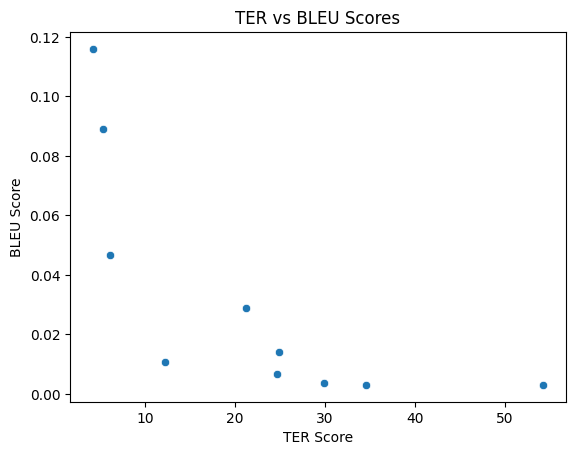

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ter_scores and bleu_scores are your lists of scores
sns.scatterplot(x=ter_scores, y=bleu_scores)
plt.xlabel('TER Score')
plt.ylabel('BLEU Score')
plt.title('TER vs BLEU Scores')
plt.show()


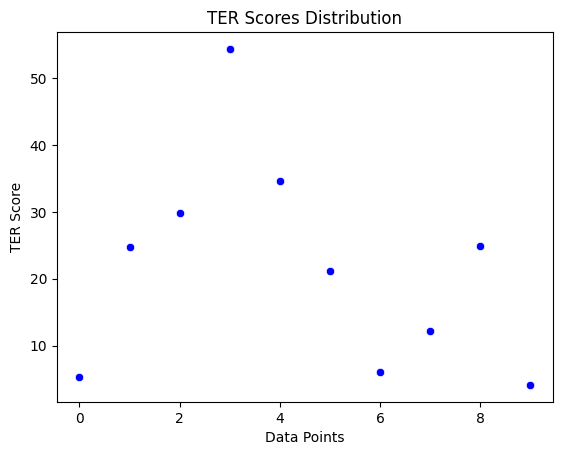

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ter_scores is your list of TER scores
sns.scatterplot(x=range(len(ter_scores)), y=ter_scores, color='blue')
plt.xlabel('Data Points')
plt.ylabel('TER Score')
plt.title('TER Scores Distribution')
plt.show()


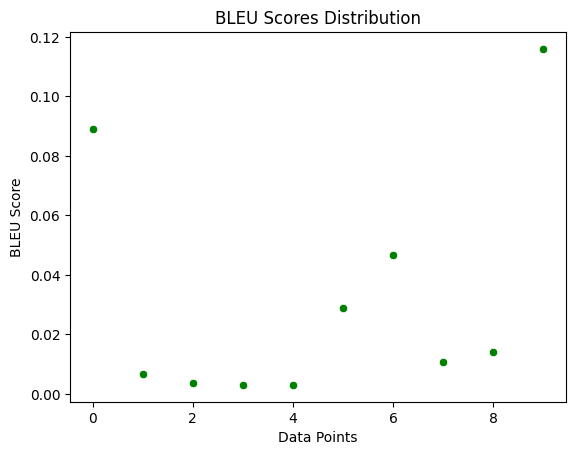

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming bleu_scores is your list of BLEU scores
sns.scatterplot(x=range(len(bleu_scores)), y=bleu_scores, color='green')
plt.xlabel('Data Points')
plt.ylabel('BLEU Score')
plt.title('BLEU Scores Distribution')
plt.show()



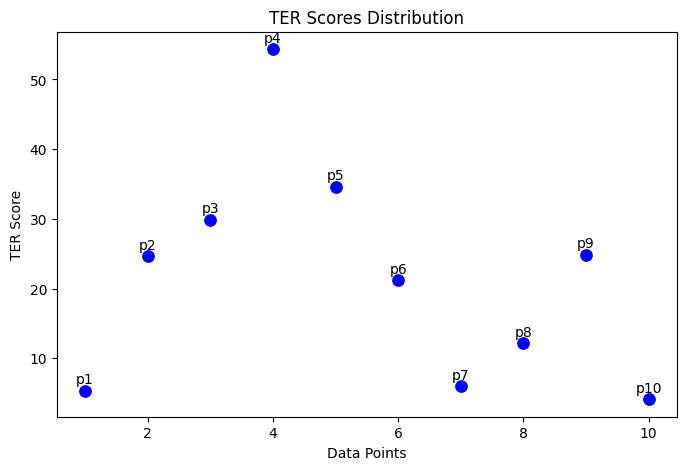

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=range(1, len(ter_scores) + 1), y=ter_scores, color='blue', s=100)

# Annotate points p1 to p10
for i, txt in enumerate(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10']):
    plt.annotate(txt, (i + 1, ter_scores[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('Data Points')
plt.ylabel('TER Score')
plt.title('TER Scores Distribution')
plt.show()

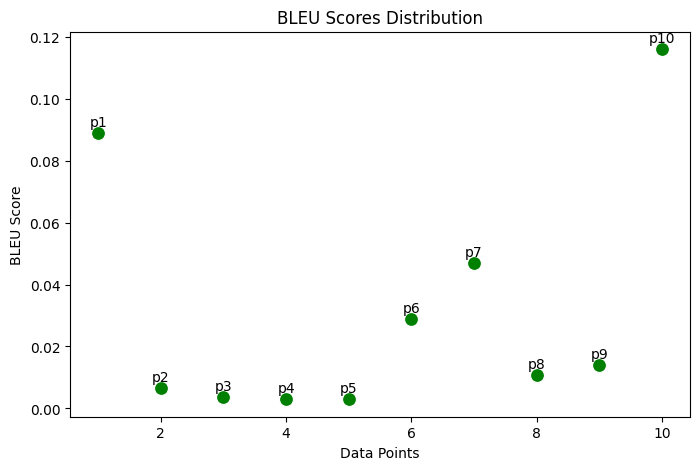

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=range(1, len(bleu_scores) + 1), y=bleu_scores, color='green', s=100)

# Annotate points p1 to p10
for i, txt in enumerate(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10']):
    plt.annotate(txt, (i + 1, bleu_scores[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('Data Points')
plt.ylabel('BLEU Score')
plt.title('BLEU Scores Distribution')
plt.show()

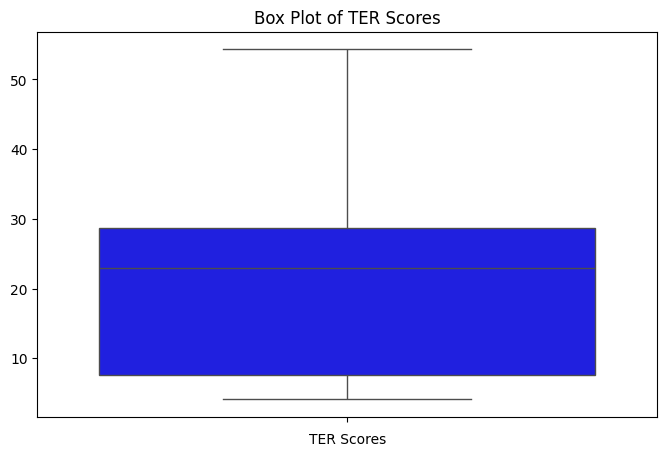

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(ter_scores, color='blue')
plt.xlabel('TER Scores')
plt.title('Box Plot of TER Scores')
plt.show()

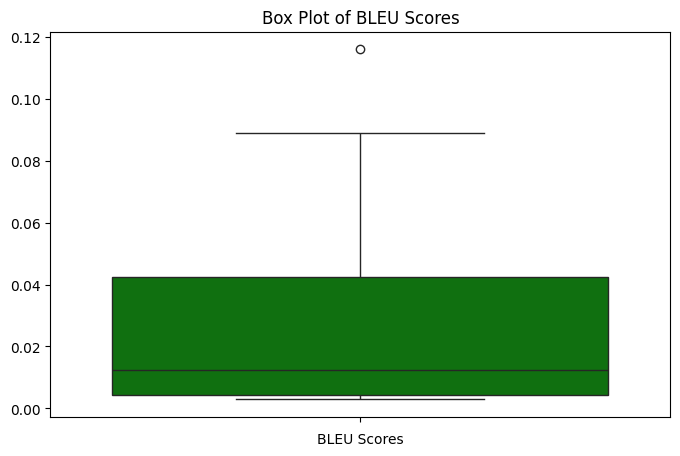

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(bleu_scores, color='green')
plt.xlabel('BLEU Scores')
plt.title('Box Plot of BLEU Scores')
plt.show()

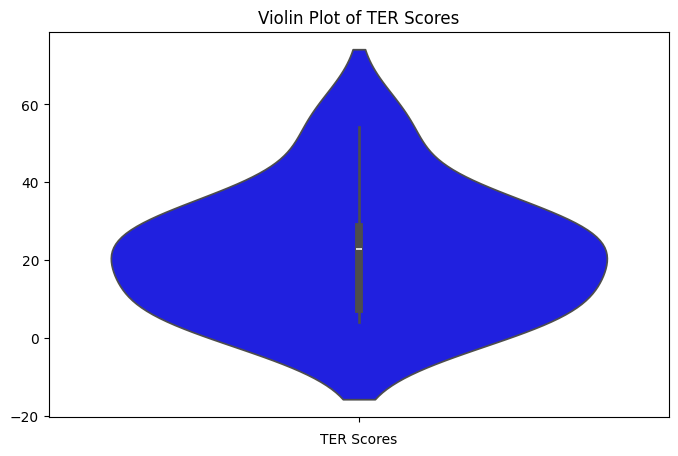

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(ter_scores, color='blue')
plt.xlabel('TER Scores')
plt.title('Violin Plot of TER Scores')
plt.show()

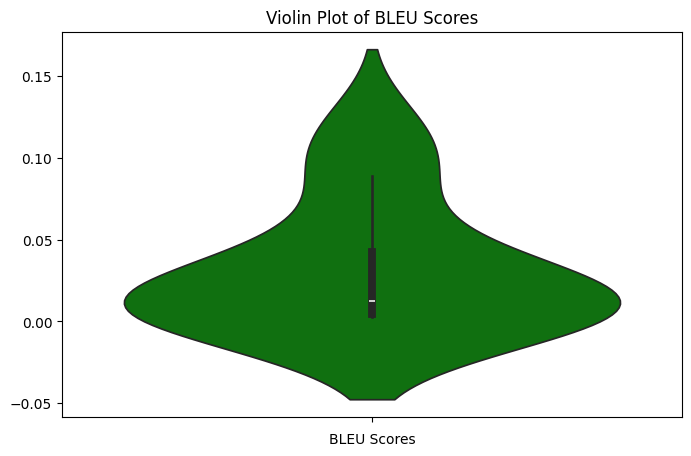

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(bleu_scores, color='green')
plt.xlabel('BLEU Scores')
plt.title('Violin Plot of BLEU Scores')
plt.show()

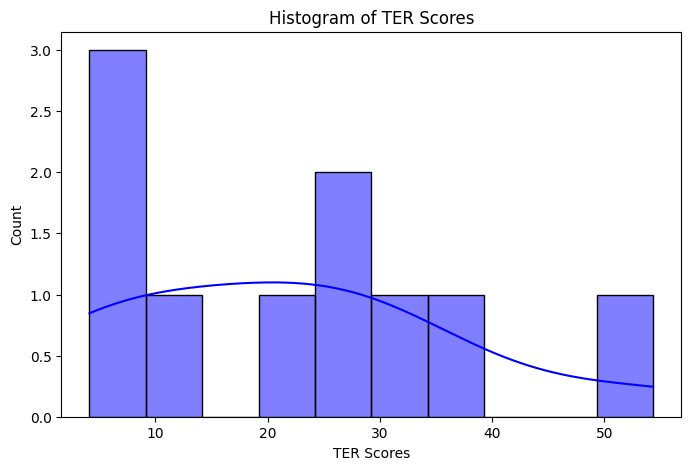

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(ter_scores, bins=10, color='blue', kde=True)
plt.xlabel('TER Scores')
plt.title('Histogram of TER Scores')
plt.show()

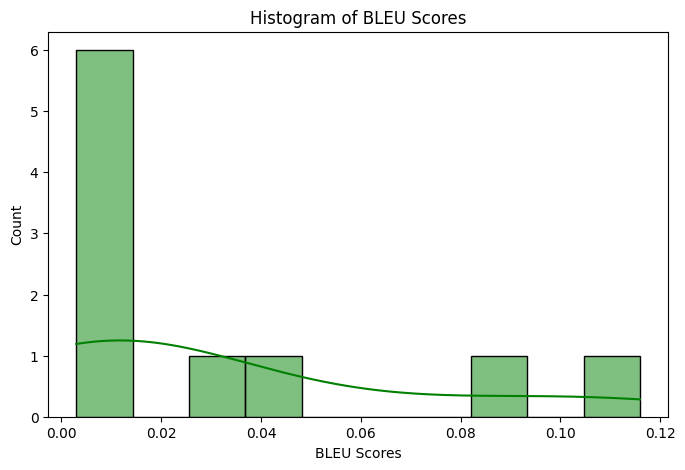

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(bleu_scores, bins=10, color='green', kde=True)
plt.xlabel('BLEU Scores')
plt.title('Histogram of BLEU Scores')
plt.show()

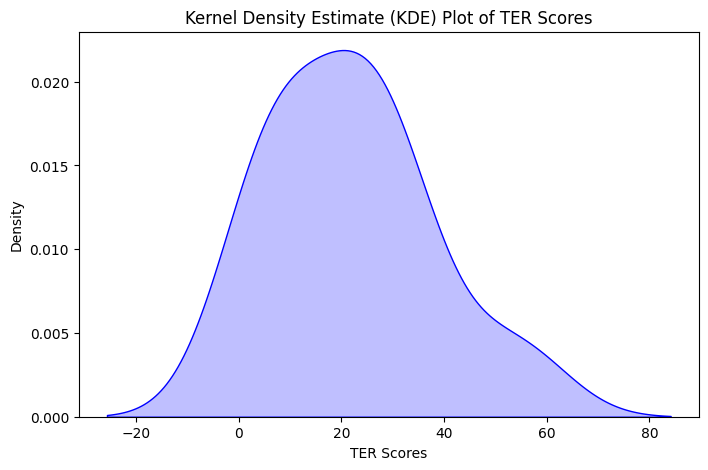

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(ter_scores, color='blue', fill=True)
plt.xlabel('TER Scores')
plt.title('Kernel Density Estimate (KDE) Plot of TER Scores')
plt.show()

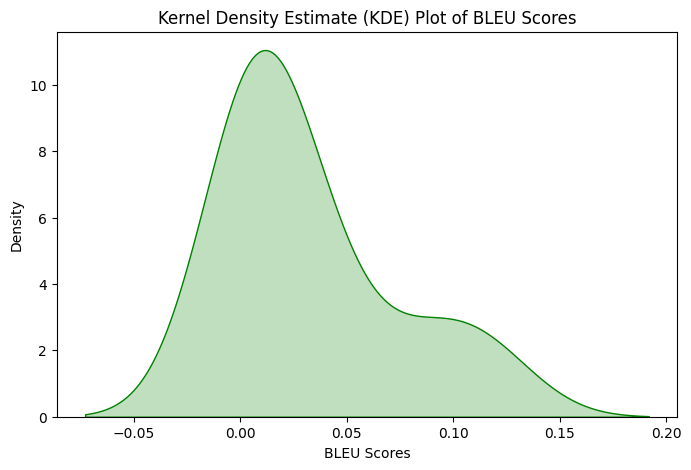

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(bleu_scores, color='green', fill=True)
plt.xlabel('BLEU Scores')
plt.title('Kernel Density Estimate (KDE) Plot of BLEU Scores')
plt.show()